In [1]:
### IMPORTS ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
#from highlight_text import htext
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer.pitch import Pitch, VerticalPitch

from matplotlib import font_manager
#font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

In [2]:
### URL ###

base_url = 'https://understat.com/player/'
player = '843'       # James Ward-Prowse
url = base_url + player

In [3]:
### SCRAPE ###

res = requests.get(url)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')

In [4]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var groupsData 		= JSON.parse('\x7B\x22season\x22\x3A\x5B\x7B\x22position\x22\x3A\x22DMC\x22,\x22games\x22\x3A\x229\x22,\x22goals\x22\x3A\x222\x22,\x22shots\x22\x3A\x2210\x22,\x22time\x22\x3A\x22798\x22,\x22xG\x22\x3A\x221.8557175267487764\x22,\x22assists\x22\x3A\x223\x22,\x22xA\x22\x3A\x222.8356522992253304\x22,\x22key_passes\x22\x3A\x2222\x22,\x22season\x22\x3A\x222023\x22,\x22team\x22\x3A\x22West\x20Ham\x22,\x22yellow\x22\x3A\x221\x22,\x22red\x22\x3A\x220\x22,\x22npg\x22\x3A\x222\x22,\x22npxG\x22\x3A\x221.8557175267487764\x22,\x22xGChain\x22\x3A\x224.080999938771129\x22,\x22xGBuildup\x22\x3A\x222.1671466659754515\x22\x7D,\x7B\x22position\x22\x3A\x22MC\x22,\x22games\x22\x3A\x2238\x22,\x22goals\x22\x3A\x229\x22,\x22shots\x22\x3A\x2244\x22,\x22time\x22\x3A\x223378\x22,\x22xG\x22\x3A\x225.408911099657416\x22,\x22assists\x22\x3A\x224\x

In [5]:
#get only shots data from scripts, 4th string ([3]) 

strings = scripts[3].string

In [6]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x5B\\x7B\\x22id\\x22\\x3A\\x2214494\\x22,\\x22minute\\x22\\x3A\\x2239\\x22,\\x22result\\x22\\x3A\\x22SavedShot\\x22,\\x22X\\x22\\x3A\\x220.7390000152587891\\x22,\\x22Y\\x22\\x3A\\x220.6079999923706054\\x22,\\x22xG\\x22\\x3A\\x220.019021300598978996\\x22,\\x22player\\x22\\x3A\\x22James\\x20Ward\\x2DProwse\\x22,\\x22h_a\\x22\\x3A\\x22a\\x22,\\x22player_id\\x22\\x3A\\x22843\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222014\\x22,\\x22shotType\\x22\\x3A\\x22RightFoot\\x22,\\x22match_id\\x22\\x3A\\x224756\\x22,\\x22h_team\\x22\\x3A\\x22Liverpool\\x22,\\x22a_team\\x22\\x3A\\x22Southampton\\x22,\\x22h_goals\\x22\\x3A\\x222\\x22,\\x22a_goals\\x22\\x3A\\x221\\x22,\\x22date\\x22\\x3A\\x222014\\x2D08\\x2D17\\x2013\\x3A30\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Jos\\x5Cu00e9\\x20Fonte\\x22,\\x22lastAction\\x22\\x3A\\x22Pass\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x2214502\\x22,\\x22minute\\x22\\x3A\\x2266\\x22,\\x22result\\x22\\x3A\

In [7]:
#strip symbols, make json

ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8)').decode('unicode_escape')

data = json.loads(json_data)

In [8]:
data

[{'id': '14494',
  'minute': '39',
  'result': 'SavedShot',
  'X': '0.7390000152587891',
  'Y': '0.6079999923706054',
  'xG': '0.019021300598978996',
  'player': 'James Ward-Prowse',
  'h_a': 'a',
  'player_id': '843',
  'situation': 'OpenPlay',
  'season': '2014',
  'shotType': 'RightFoot',
  'match_id': '4756',
  'h_team': 'Liverpool',
  'a_team': 'Southampton',
  'h_goals': '2',
  'a_goals': '1',
  'date': '2014-08-17 13:30:00',
  'player_assisted': 'José Fonte',
  'lastAction': 'Pass'},
 {'id': '14502',
  'minute': '66',
  'result': 'BlockedShot',
  'X': '0.730999984741211',
  'Y': '0.629000015258789',
  'xG': '0.015140400268137455',
  'player': 'James Ward-Prowse',
  'h_a': 'a',
  'player_id': '843',
  'situation': 'OpenPlay',
  'season': '2014',
  'shotType': 'RightFoot',
  'match_id': '4756',
  'h_team': 'Liverpool',
  'a_team': 'Southampton',
  'h_goals': '2',
  'a_goals': '1',
  'date': '2014-08-17 13:30:00',
  'player_assisted': 'José Fonte',
  'lastAction': 'BallRecovery'},


In [9]:
print(len(data))

370


57


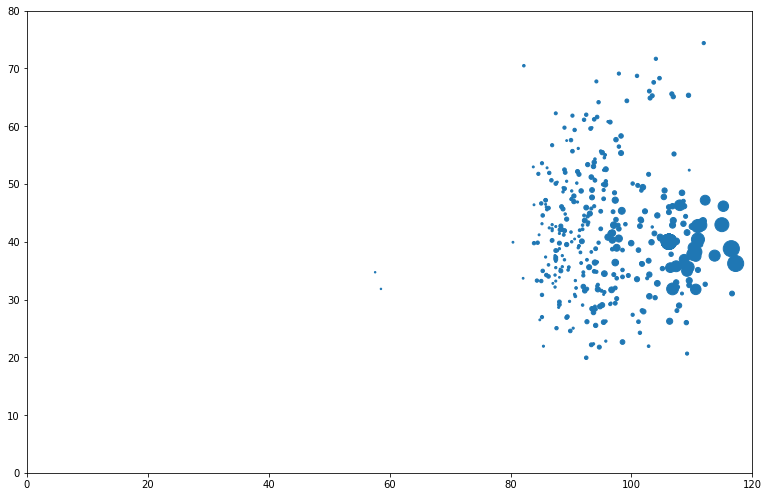

In [10]:
### DATA CLEANING ###

X = []
Y = []
xG = []
situation = []
shotType = []
h_a = []
h_team = []
a_team = []
date = []
result = []
player = []
season = []


for index in range(len(data)):
    for key in data[index]:
        if key == 'X':
            X.append(data[index][key])
        if key == 'Y':
            Y.append(data[index][key])
        if key == 'situation':
            situation.append(data[index][key])
        if key == 'shotType':
            shotType.append(data[index][key])
        if key == 'h_team':
            h_team.append(data[index][key])
        if key == 'a_team':
            a_team.append(data[index][key])
        if key == 'xG':
            xG.append(data[index][key])
        if key == 'player':
            player.append(data[index][key])
        if key == 'result':
            result.append(data[index][key])
        if key == 'h_a':
            h_a.append(data[index][key])
        if key == 'season':
            season.append(data[index][key])

            


col_names = ['X','Y','result','xG','situation','shotType','h_team','a_team','h_a','season']
df = pd.DataFrame([X,Y,result,xG,situation,shotType,h_team,a_team,h_a,season],index=col_names)
df = df.T

convert_dict = {'X': float,
                'Y': float,
                'xG': float,
                }

df = df.astype(convert_dict)
df = df
#print(df.dtypes)

fig, ax = plt.subplots(figsize=(13,8.5))

#pitch = Pitch(pitch_type='statsbomb')

ax.scatter(df['X']*120,df['Y']*80,s=df['xG']*300)
plt.ylim(0,80)
plt.xlim(0,120)


df_fk = df.loc[df['situation']=='DirectFreekick']
fk_saved = len(df_fk.loc[df['result'] == 'SavedShot'])
fk_goals = len(df_fk.loc[df['result'] == 'Goal'])
fk_OnTarget = fk_saved + fk_goals
df_fk_goals = df_fk.loc[df['result']=='Goal']
xG_cum = df_fk['xG'].cumsum()
xG_tot = xG_cum.iat[-1]
xG_tot = round(xG_tot, 2)

print(fk_OnTarget)

In [11]:
print(df_fk)

pd.to_csv(path_or_'jwp_fk_data_v2',index=False)

SyntaxError: invalid syntax (3093983076.py, line 3)

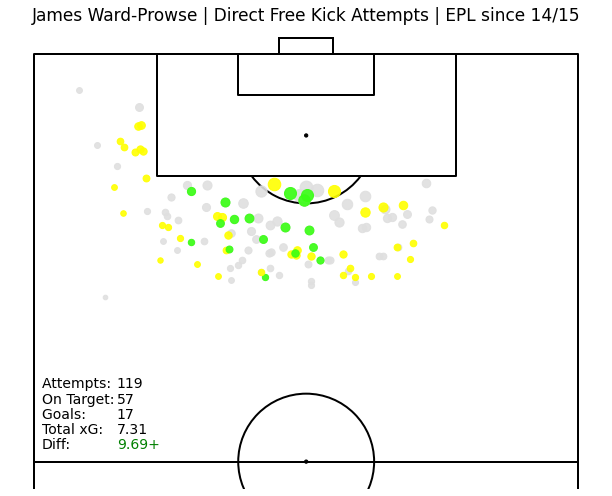

In [26]:
#### PLOTTING #####


fig, ax = plt.subplots(figsize=(13,8.5))

#fig.set_facecolor('#22312b')
#ax.patch.set_facecolor('#22312b')
#plt.ylim(5,80)
#plt.xlim(0,120)

pitch = pitch = VerticalPitch(half=True,goal_type='box',line_color='black')
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

ax.set_title('James Ward-Prowse | Direct Free Kick Attempts | EPL since 14/15',fontsize=17)

for x in range(len(df['X'])):
        if df['situation'][x] == 'DirectFreekick':
            if df['result'][x] == 'Goal': 
                plt.scatter(df['Y'][x]*79,df['X'][x]*123, color = '#39FF14',s=df['xG'][x]*1000,zorder=2,alpha=.9,label="Goal")
            if df['result'][x] == 'SavedShot':
                plt.scatter(df['Y'][x]*79,df['X'][x]*123, color = '#FFFF00',s=df['xG'][x]*1000,zorder=2,alpha=.9,label="Saved")
            else:
                plt.scatter(df['Y'][x]*79,df['X'][x]*123, color = '#DFDFDF',s=df['xG'][x]*1000,zorder=1,alpha=.9, label="Off Target")
            

              
fig.text(0.23,0.29,"Attempts: ",fontsize=14)
fig.text(0.31,0.29,str(len(df_fk)),fontsize=14)
fig.text(0.23,0.265,"On Target: ",fontsize=14)
fig.text(0.31,0.265,str(fk_OnTarget),fontsize=14)
fig.text(0.23,0.24,"Goals: ",fontsize=14)
fig.text(0.31,0.24,str(fk_goals),fontsize=14)
fig.text(0.23,0.215,"Total xG:",fontsize=14)
fig.text(0.31,0.215,str(xG_tot),fontsize=14)
fig.text(0.23,0.19,"Diff:",fontsize=14)
fig.text(0.31,0.19,"9.69+",fontsize=14, color='green')


fig.savefig('figures/JWP_FKS.jpg')
#ax.legend()

/opt/anaconda3/envs/f1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


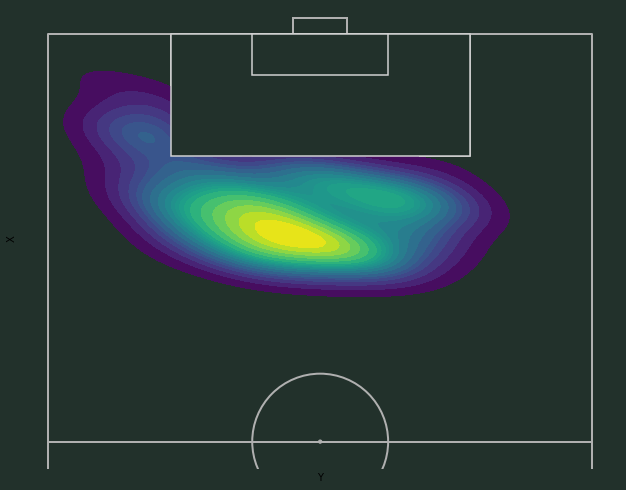

In [13]:
fig, ax = plt.subplots(figsize=(13,8.5))




kde = sns.kdeplot(
    df_fk['Y']*79,
    df_fk['X']*122,
    fill=True,
    shade_lowest=False,
    alpha=1,
    n_levels=20,
    cmap='viridis'
)


pitch = VerticalPitch(half=True, goal_type='box')
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()
plt.gca().invert_xaxis()


## Opaque box for freelkick heatmap
box_18 = patches.Rectangle((18, 102), 44, 18, linewidth=1.5, edgecolor='lightgrey', facecolor='#22312b')
box_6 = patches.Rectangle((30, 114), 20, 6, linewidth=1.5, edgecolor='lightgrey', facecolor='#22312b')
ax.add_patch(box_18)
ax.add_patch(box_6)

fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#plt.scatter(df_fk['X'],df_fk['Y'])

            

              

/opt/anaconda3/envs/f1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


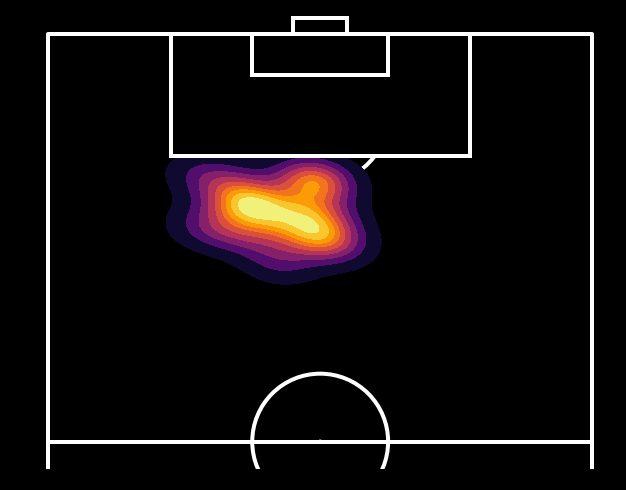

In [14]:
fig, ax = plt.subplots(figsize=(13,8.5))

#fig.set_facecolor('#22312b')
#ax.patch.set_facecolor('#22312b')
#plt.ylim(5,80)
#plt.xlim(0,120)


kde = sns.kdeplot(
    df_fk_goals['Y']*79,
    df_fk_goals['X']*122,
    fill=True,
    shade_lowest=False,
    alpha=1,
    n_levels=10,
    cmap='inferno'
)



pitch = pitch = VerticalPitch(half=True, goal_type='box', line_color='white', linewidth=4)
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

box_18 = patches.Rectangle((18, 102), 44, 18, linewidth=4, edgecolor='white', facecolor='black')
box_6 = patches.Rectangle((30, 114), 20, 6, linewidth=4, edgecolor='white', facecolor='black')
ax.add_patch(box_18)
ax.add_patch(box_6)

fig.set_facecolor('black')
ax.patch.set_facecolor('black')


Text(0.5, 0.5, 'heat_b')

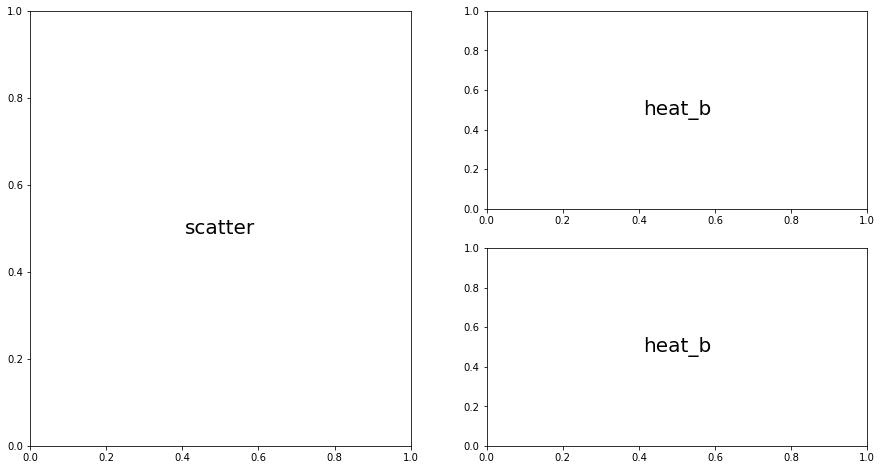

In [15]:
layout = [["scatter", "heat_a"],
          ["scatter", "heat_b"]]

fig = plt.figure(figsize = (15,8))

ax_dict = fig.subplot_mosaic(
    layout
)

ax_dict["scatter"].annotate(
    xy = (.5,.5),
    text = "scatter",
    ha = "center",
    va = "center",
    size = 20
)

ax_dict["heat_a"].annotate(
    xy = (.5,.5),
    text = "heat_b",
    ha = "center",
    va = "center",
    size = 20
)

ax_dict["heat_b"].annotate(
    xy = (.5,.5),
    text = "heat_b",
    ha = "center",
    va = "center",
    size = 20
)

/opt/anaconda3/envs/f1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


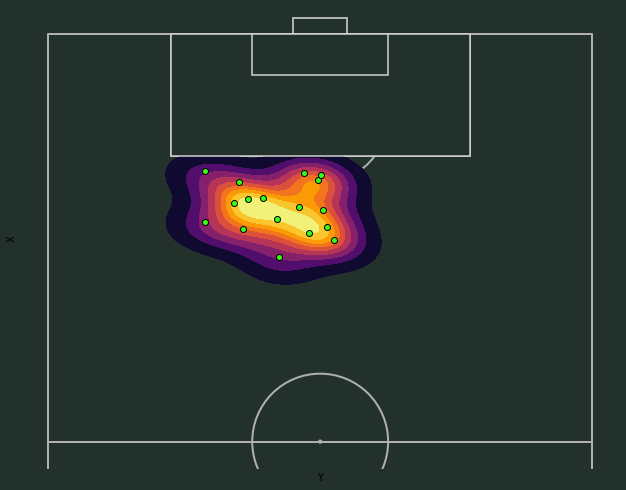

In [16]:
fig, ax = plt.subplots(figsize=(13,8.5))

#fig.set_facecolor('#22312b')
#ax.patch.set_facecolor('#22312b')
#plt.ylim(5,80)
#plt.xlim(0,120)


kde2 = sns.kdeplot(
    df_fk_goals['Y']*79,
    df_fk_goals['X']*122,
    fill=True,
    shade_lowest=False,
    alpha=1,
    n_levels=10,
    cmap='inferno',

)

for x in range(len(df['X'])):
        if df['situation'][x] == 'DirectFreekick':
            if df['result'][x] == 'Goal': 
                plt.scatter(df['Y'][x]*79,df['X'][x]*123, color = '#39FF14', edgecolor='black',zorder=2,alpha=1,label="Goal")

pitch = pitch = VerticalPitch(half=True, goal_type='box')
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

box_18 = patches.Rectangle((18, 102), 44, 18, linewidth=1.5, edgecolor='lightgrey', facecolor='#22312b')
box_6 = patches.Rectangle((30, 114), 20, 6, linewidth=1.5, edgecolor='lightgrey', facecolor='#22312b')
ax.add_patch(box_18)
ax.add_patch(box_6)

fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

/opt/anaconda3/envs/f1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


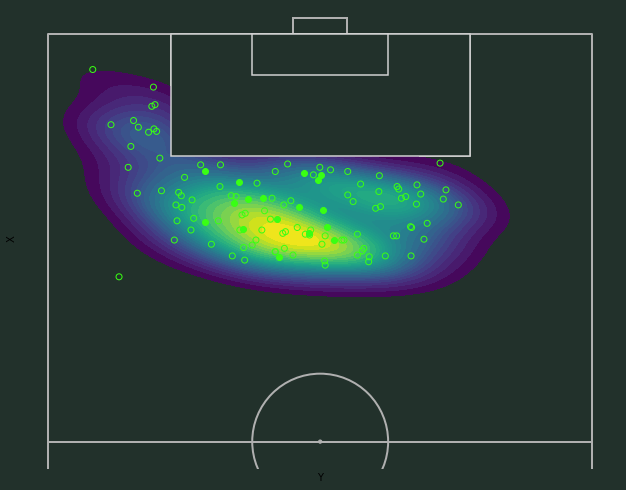

In [17]:
fig, ax = plt.subplots(figsize=(13,8.5))




kde = sns.kdeplot(
    df_fk['Y']*79,
    df_fk['X']*122,
    fill=True,
    shade_lowest=False,
    alpha=1,
    n_levels=30,
    cmap='viridis'
)

            
for x in range(len(df['X'])):
        if df['situation'][x] == 'DirectFreekick':
            if df['result'][x] == 'Goal': 
                plt.scatter(df['Y'][x]*79,df['X'][x]*123, color = '#39FF14',zorder=2,alpha=1)
            else:
                plt.scatter(df['Y'][x]*79,df['X'][x]*123, color = 'none', edgecolor= '#39FF14',zorder=2,alpha=1)

pitch = VerticalPitch(half=True, goal_type='box')
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()
plt.gca().invert_xaxis()


## Opaque box for freelkick heatmap
box_18 = patches.Rectangle((18, 102), 44, 18, linewidth=1.5, edgecolor='lightgrey', facecolor='#22312b')
box_6 = patches.Rectangle((30, 114), 20, 6, linewidth=1.5, edgecolor='lightgrey', facecolor='#22312b')
ax.add_patch(box_18)
ax.add_patch(box_6)

fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')



In [29]:
df_fk['Xi'] = df_fk['Y']*68
df_fk['Yi'] = df_fk['X']*105

<ipython-input-29-543fca3f35f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fk['Xi'] = df_fk['Y']*68
<ipython-input-29-543fca3f35f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fk['Yi'] = df_fk['X']*105


In [62]:
df_fk

df_fk.to_csv('data/JWP_FK_v2.csv')

In [31]:
def soc_pitch_divisions(ax, grids = False):
    '''
    This function returns a vertical football pitch
    divided in specific locations.

    Args:
        ax (obj): a matplotlib axes.
        grids (bool): should we draw the grid lines?
    '''

    # Notice the extra parameters passed to the object
    pitch = VerticalPitch(
        pitch_type = "uefa",
        half = True,
        goal_type='box',
        linewidth = 1.25,
        line_color='black'
    )

    pitch.draw(ax = ax)

    # Where we'll draw the lines
    if grids:
        y_lines = [105 - 5.5*x for x in range(1,10)]
        x_lines = [68 - 6.8*x for x in range(1,10)]

        for i in x_lines:
            ax.plot(
                [i, i], [45, 105], 
                color = "lightgray", 
                ls = "--",
                lw = 0.75,
                zorder = -1
            )
        for j in y_lines:
            ax.plot(
                [68, 0], [j, j],
                color = "lightgray", 
                ls = "--",
                lw = 0.75,
                zorder = -1
            )

    return ax

In [32]:


# We define the cuts for our data (same as our pitch divisions)
# Only difference is we need to add the edges

y_bins = [105] + [105 - 5.5*x for x in range(1,10)] + [45]
x_bins = [68] + [68 - 6.8*x for x in range(1,10)] + [0]

x_bins.sort()
y_bins.sort()

KeyError: 'bins_x'

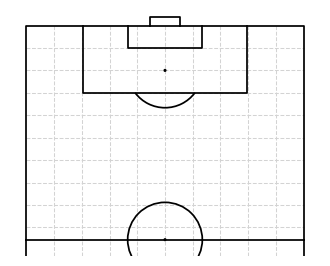

In [33]:
fig = plt.figure(figsize = (4,4), dpi = 100)
ax = plt.subplot(111)

soc_pitch_divisions(ax, grids = True)

counter = 0
for X, Y in zip(df_fk["bins_x"], df_fk["bins_y"]):
	#This colours our bins
    ax.fill_between(
        x = [X.left, X.right],
        y1 = Y.left,
        y2 = Y.right,
        color = "#495371",
        alpha = example_df["xGOT_scaled"].iloc[counter],
        zorder = -1,
        lw = 0
    )